# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest

df = pd.read_csv('data/human_body_temperature.csv')


## Q1. Is the distribution of body temperatures normal?

> Yes, it appears that the temperatures are approximately normal, although perhaps a bit skewed towards lower temperatures.

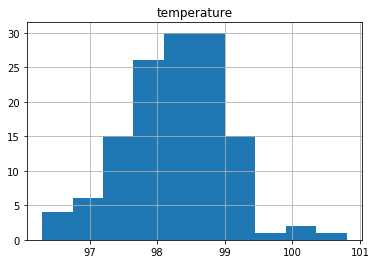

In [2]:
_ = df.hist(column='temperature')

## Q2. Is the sample size large? Are the observations independent?

> Yes, sample size is >= 30

> Observations are assumed to be independent, taken from different people assumed to be randomly selected.

In [3]:
print(df.index.size)

130


## Q3. Is the true population mean really 98.6 degrees F?

> No, the population mean is NOT really 98.6 degrees F

- Would you use a one-sample or two-sample test? Why?
> One sample, because we are comparing the mean of our sample to a known value, not another sample.
- In this situation, is it appropriate to use the $t$ or $z$ statistic?
> Either, because we are comparing a large enough sample to a known population mean.
- Now try using the other test. How is the result be different? Why?
> The result is essentially the same, both p-values are extremely small.

In [4]:
temperature_t = stats.ttest_1samp(df.temperature, 98.6)

print('t-test p-value:', temperature_t.pvalue)

t-test p-value: 2.4106320415561276e-07


In [5]:
temperature_z = ztest(df.temperature, value=98.6)

print('z-test p-value:', temperature_z[1])

z-test p-value: 4.9021570141012155e-08


## Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

- Which one is the correct one to use?
> A t-test is the choice since our sample size is less than 30.
- What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
> Both tests show p-values > .05, but repeated runs of these tests show drastically different p-values, meaning that a sample size of 10 is far too small

In [6]:
sample_10 = df.temperature.sample(10, random_state=42)

print(sample_10)

55     98.6
40     98.4
19     99.4
31     97.6
115    98.0
56     98.8
69     98.9
105    96.7
81     98.0
26     97.8
Name: temperature, dtype: float64


In [9]:
temperature_t_sample = stats.ttest_1samp(sample_10, 98.6)

print('t-test (n=10) p-value:', temperature_t_sample.pvalue)

t-test (n=10) p-value: 0.15304624869561917


In [10]:
temperature_z_sample = ztest(sample_10, value=98.6)

print('z-test (n=10) p-value:', temperature_z_sample[1])

z-test (n=10) p-value: 0.11861362990253162


## Q5. At what temperature should we consider someone's temperature to be "abnormal"?

> Using a 95% confidence interval, the normal body temperature range is between 98.123 and 98.375 degrees F

In [25]:
n = len(df.temperature)
mean = df.temperature.mean()
stdev = df.temperature.std()
cv = 1.96
se = stdev/math.sqrt(n)

low, high = mean - (cv * se), mean + (cv * se)

low = round(low, 3)
high = round(high, 3)

print('(abnormal)', low, '< (normal) <', high, '(abnormal)')

(abnormal) 98.123 < (normal) < 98.375 (abnormal)


## Q6. Is there a significant difference between males and females in normal temperature?

> Yes, there is a statistically significant difference in normal body temperature between males and females

In [41]:
male = df[df.gender == 'M']
female = df[df.gender == 'F']

print('# males:', male.index.size)
print('# females:', female.index.size)

# males: 65
# females: 65


In [48]:
gender_difference = ztest(x1=male.temperature, x2=female.temperature)

print('z-test for difference in temp between genders')
print('p-value:', round(gender_difference[1],3))

z-test for difference in temp between genders
p-value: 0.022
